In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/.......csv')

In [ ]:
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df=df.dropna()
df=df.reset_index()
df=df[["text",'label']]


In [ ]:
df.head()


,text,label
0,No comment is expected from Barack Obama Membe...,1
1,"Now, most of the demonstrators gathered last ...",1
2,A dozen politically active pastors came here f...,0
3,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,All we can say on this one is it s about time ...,1


In [ ]:
import re
import string
def clean_text(article):
    #print(article)
    text = article.lower()
    text = text.replace('\n', " ")
    tokens = text.split(" ")
    regex = "[a-zA-Z]"
    refined_tokens = []
    for item in tokens:
        if re.match(regex, item):
            refined_tokens.append(item)
    cleaned_text = ' '.join(token for token in refined_tokens)
    return cleaned_text.translate(str.maketrans('', '', string.punctuation))

In [ ]:

df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

In [ ]:
df1=df.copy()

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df=df[["cleaned_text","label"]]
df.shape

(71537, 2)

In [ ]:
df = df.loc[0:5000, :]

In [ ]:
df.tail()

,cleaned_text,label
4996,she wanted him to assimilate she gave him a go...,1
4997,moscow the kremlin may have spent years revili...,0
4998,san francisco alphabet inc’s google unit told ...,0
4999,baghdad iraq wants the kurdistan region to sto...,0
5000,getting rich off of the misery of others very ...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of label ')

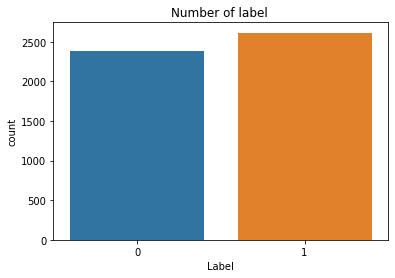

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.label)
plt.xlabel('Label')
plt.title('Number of label ')

In [ ]:
df.head()

,cleaned_text,label
0,no comment is expected from barack obama membe...,1
1,now most of the demonstrators gathered last ni...,1
2,a dozen politically active pastors came here f...,0
3,the rs28 sarmat missile dubbed satan will repl...,1
4,all we can say on this one is it s about time ...,1


In [ ]:
df=df[:30000]

In [ ]:
df.to_csv('/content/drive/MyDrive/cleaned_data1.csv')

In [ ]:
df

In [ ]:
df.to_csv('/content/drive/MyDrive/SM/cleaned_data1.csv')

In [ ]:
dff=pd.read_csv('/content/drive/MyDrive/cleaned_data1.csv',lineterminator="\n")

In [ ]:
dff

,Unnamed: 0,cleaned_text,label
0,0,no comment is expected from barack obama membe...,1
1,1,now most of the demonstrators gathered last ni...,1
2,2,a dozen politically active pastors came here f...,0
3,3,the rs28 sarmat missile dubbed satan will repl...,1
4,4,all we can say on this one is it s about time ...,1
...,...,...,...
4996,4996,she wanted him to assimilate she gave him a go...,1
4997,4997,moscow the kremlin may have spent years revili...,0
4998,4998,san francisco alphabet inc’s google unit told ...,0
4999,4999,baghdad iraq wants the kurdistan region to sto...,0


In [ ]:
df=dff[["cleaned_text","label"]]

In [ ]:
df

,cleaned_text,label
0,no comment is expected from barack obama membe...,1
1,now most of the demonstrators gathered last ni...,1
2,a dozen politically active pastors came here f...,0
3,the rs28 sarmat missile dubbed satan will repl...,1
4,all we can say on this one is it s about time ...,1
...,...,...
4996,she wanted him to assimilate she gave him a go...,1
4997,moscow the kremlin may have spent years revili...,0
4998,san francisco alphabet inc’s google unit told ...,0
4999,baghdad iraq wants the kurdistan region to sto...,0


In [ ]:
import torch
!pip install transformers
import transformers as ppb

import pandas as pd
import numpy as np

gpu_available = False
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    gpu_available = True

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


print("finish loading library")

torch.manual_seed(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
There are 1 GPU(s) available.
We will use the GPU: Tesla T4
finish loading library


In [ ]:
dff.tail(10)

,Unnamed: 0,cleaned_text,label
4991,4991,reza zarrab a prominent turkish gold trader wh...,0
4992,4992,washingtonnew york the special counsel investi...,0
4993,4993,donald trump thanked outgoing fbi director jam...,1
4994,4994,to watch the video of photographer tim tai get...,0
4995,4995,ever since supreme court justice antonin scali...,1
4996,4996,she wanted him to assimilate she gave him a go...,1
4997,4997,moscow the kremlin may have spent years revili...,0
4998,4998,san francisco alphabet inc’s google unit told ...,0
4999,4999,baghdad iraq wants the kurdistan region to sto...,0
5000,5000,getting rich off of the misery of others very ...,1


In [ ]:
df=dff.dropna()

In [ ]:
df = df.reset_index()

In [ ]:
df.head(10)

,index,Unnamed: 0,cleaned_text,label
0,0,0,no comment is expected from barack obama membe...,1
1,1,1,now most of the demonstrators gathered last ni...,1
2,2,2,a dozen politically active pastors came here f...,0
3,3,3,the rs28 sarmat missile dubbed satan will repl...,1
4,4,4,all we can say on this one is it s about time ...,1
5,5,5,dr ben carson tells the story of what happened...,1
6,7,7,the owner of the ringling bar located south of...,1
7,8,8,file in this sept file photo the marker that w...,1
8,9,9,the most punchable altright nazi on the intern...,1
9,10,10,brussels british prime minister theresa may s ...,0


In [ ]:
df=df[["cleaned_text","label"]]

In [ ]:
df.head(10)

,cleaned_text,label
0,no comment is expected from barack obama membe...,1
1,now most of the demonstrators gathered last ni...,1
2,a dozen politically active pastors came here f...,0
3,the rs28 sarmat missile dubbed satan will repl...,1
4,all we can say on this one is it s about time ...,1
5,dr ben carson tells the story of what happened...,1
6,the owner of the ringling bar located south of...,1
7,file in this sept file photo the marker that w...,1
8,the most punchable altright nazi on the intern...,1
9,brussels british prime minister theresa may s ...,0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.reset_index()

,index,cleaned_text,label
0,1485,lloyd billingsley debates between donald trump...,1
1,3915,back story of fbi’s hillary coverup fbi corrup...,1
2,3061,washington president donald trump’s eldest son...,0
3,4514,hillary clinton s pointing the finger at the v...,1
4,2359,washington the draft bill introduced in the us...,0
...,...,...,...
3946,1419,donald trump probably did not enjoy watching f...,1
3947,497,washington president trump said on tuesday tha...,0
3948,2063,tim brown well leave it to the democrats in ne...,1
3949,1768,century wire says despite the mass media distr...,1


In [ ]:
train=train[["cleaned_text","label"]]

In [ ]:
test.reset_index()
test=test[["cleaned_text","label"]]

In [ ]:
train.to_csv('/content/drive/MyDrive/train.csv')
test.to_csv('/content/drive/MyDrive/test.csv')


In [ ]:
#Load training and test data

training_data = pd.read_csv("/content/drive/MyDrive/train.csv", index_col = 0,lineterminator="\n")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv", index_col = 0,lineterminator="\n")

training_label = training_data["label"].values
training_content = training_data["cleaned_text"].values.astype("str")


test_label = test_data["label"].values
test_content = test_data["cleaned_text"].values.astype("str")



print("finish loading data")

finish loading data


In [ ]:
#Tokenization
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

training_input_ids = []
training_attention_masks = []

# For every sentence...
for sent in training_data['cleaned_text']:
    
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 128,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',     
                        # return_overflowing_tokens = False
                   )
    
    training_input_ids.append(encoded_dict['input_ids'])
    
    training_attention_masks.append(encoded_dict['attention_mask'])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Convert the lists into tensors.
training_input_ids = torch.cat(training_input_ids, dim=0)
training_attention_masks = torch.cat(training_attention_masks, dim=0)
training_labels = torch.tensor(training_label, dtype = torch.long)   



test_input_ids = []
test_attention_masks = []

 # For every sentence...
for sent in test_data['cleaned_text']:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 128,          .
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        # truncation = True,
                        return_tensors = 'pt',     
                        # return_overflowing_tokens = False
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
test_labels = torch.tensor(test_label, dtype = torch.long)


              
print("finish tokenization")

finish tokenization


In [ ]:

#Generate Dataset

from torch.utils.data import TensorDataset

train_dataset = TensorDataset(training_input_ids, training_attention_masks, training_labels)
val_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 8 #16

train_dataloader = DataLoader(
            train_dataset,  .
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )


validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = len(test_data) 
        )



In [ ]:
#Training the model

from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2, 
                    
    output_attentions = False,
    output_hidden_states = False, 
)

# Tell pytorch to run this model on the GPU.
# if gpu_available == True:
model.cuda()

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8
                )


Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 3


total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


import numpy as np

from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import confusion_matrix

def flat_score(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    print(confusion_matrix(labels_flat, pred_flat))
    score = precision_recall_fscore_support(labels_flat, pred_flat, average = None)
    return np.sum(pred_flat == labels_flat) / len(labels_flat), score[0][1], score[1][1], score[2][1]



import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
 
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))


import random
import numpy as np


seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


training_stats = []

total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0


    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 100 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()  


        
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
        
        # outputs is a tuple
        loss = outputs[0]
        total_train_loss += loss.item()
        


        loss.backward()


        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)


        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
  
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    
    torch.save(model.state_dict(),'bert' + str(epoch_i) + '.pt')
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    precision = 0
    recall = 0
    f1_score = 0


    for batch in validation_dataloader:
        
 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        

        with torch.no_grad():        


            outputs = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        loss = outputs[0]
        total_eval_loss += loss.item()
        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        scores = flat_score(logits, label_ids)
        total_eval_accuracy += scores[0]
        precision += scores[1]
        recall += scores[2]
        f1_score += scores[3]
        


    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.5f}".format(avg_val_accuracy))
    print("  Precision: {0:.5f}".format(precision))
    print("  Recall: {0:.5f}".format(recall))
    print("  f1-score: {0:.5f}".format(f1_score))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))








======== Epoch 1 / 3 ========
Training...
  Batch   100  of    494.    Elapsed: 0:00:19.
  Batch   200  of    494.    Elapsed: 0:00:39.
  Batch   300  of    494.    Elapsed: 0:00:59.
  Batch   400  of    494.    Elapsed: 0:01:19.

  Average training loss: 0.26
  Training epcoh took: 0:01:38

Running Validation...
[[465  25]
 [ 20 478]]
  Accuracy: 0.95445
  Precision: 0.95030
  Recall: 0.95984
  f1-score: 0.95504
  Validation Loss: 0.15
  Validation took: 0:00:07

======== Epoch 2 / 3 ========
Training...
  Batch   100  of    494.    Elapsed: 0:00:21.
  Batch   200  of    494.    Elapsed: 0:00:41.
  Batch   300  of    494.    Elapsed: 0:01:01.
  Batch   400  of    494.    Elapsed: 0:01:22.

  Average training loss: 0.09
  Training epcoh took: 0:01:41

Running Validation...
[[474  16]
 [ 33 465]]
  Accuracy: 0.95040
  Precision: 0.96674
  Recall: 0.93373
  f1-score: 0.94995
  Validation Loss: 0.22
  Validation took: 0:00:07

======== Epoch 3 / 3 ========
Training...
  Batch   100  of  

In [ ]:
avg_val_accuracy

0.9595141700404858